In [172]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as mpl
import os
#import clear_output
%matplotlib inline
df_csv=pd.read_csv('cdata.csv')
df_csv


,x,y,cluster
0,2.1364,0.8369,1
1,7.4096,-1.4137,3
2,5.0996,1.1552,0
3,7.8149,-1.0186,3
4,1.8925,1.2714,1
...,...,...,...
295,1.5798,1.9737,1
296,1.3918,2.5183,1
297,4.5359,0.4390,0
298,7.7911,0.3695,3


[[4.0268, 0.1867], [3.9565, 0.4538], [4.1761, 0.0079], [3.8079, 0.5294]]


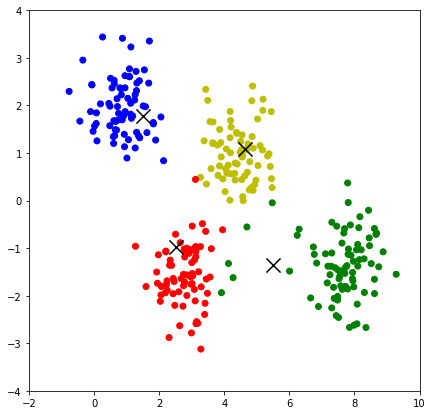

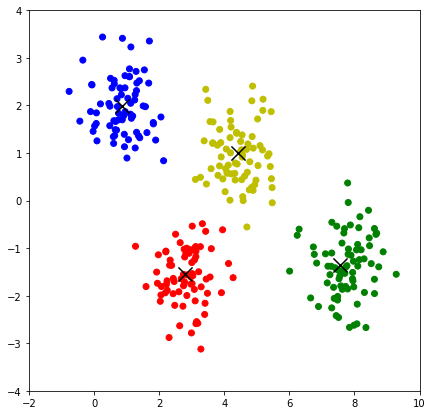

In [173]:
#由於我發現，一開始隨機挑選cluster的話，到時候kmeans完的結果不一定會四個cluster會分別在集群的正中間。
#因此我使用了初始優化，先找出每個點對於其他299個點的距離總和，再取出總和前4小的去當成初始的四個cluster，這樣會
#使後來的kmeans做出來的結果都是最佳的分布

color=['r','y','g','b']
to_other=[]
for i in range(len(df_csv)):
    dis=0
    for j in range(len(df_csv)):
        dis+=np.sqrt((df_csv['x'][i]-df_csv['x'][j])**2+(df_csv['y'][i]-df_csv['y'][j])**2)
    to_other.append(dis)
#print(to_other)
a=[]
for i in range(len(to_other)):
    a.append(to_other[i])
a.sort(reverse=False)
#print(a)
#print(to_other)
list_cluster=[]
for i in range(4):
    list_cluster.append(a[i])
#print(list_cluster)
#print(to_other)
lst=[[],[],[],[]]
for i in range(len(list_cluster)):
    for j in range(len(to_other)):
        if list_cluster[i]==to_other[j]:
            lst[i].append(df_csv['x'][j])
            lst[i].append(df_csv['y'][j])
print(lst)
min_dist=[]
cluster=[]
for i in range(len(df_csv)):
    dist=[]
    for j in range(len(lst)):
        a=np.sqrt((df_csv['x'][i]-lst[j][0])**2+(df_csv['y'][i]-lst[j][1])**2) 
        dist.append(a)
    min_dist.append(min(dist))
    cluster.append(dist.index(min(dist)))
df_csv['cluster']=cluster
df_csv

    

while(True):
    lst=[[],[],[],[]]

    clst=df_csv['cluster'].tolist()
    for i in range(4):
        x=[]
        y=[]
        for j in range(len(df_csv)):
        
            #print(df_csv)
            #print()
          #  print(type(df_csv['cluster'][j]))
          #  print(type(i))
            if df_csv['cluster'][j]==i:
                x.append(df_csv['x'][j])
                y.append(df_csv['y'][j])
        #print(x)
        lst[i].append(np.mean(x))
        lst[i].append(np.mean(y))
    min_dist=[]
    cluster=[]
    color_list=[]
    for i in range(len(df_csv)):
        dist=[]
        for j in range(len(lst)):
            a=np.sqrt((df_csv['x'][i]-lst[j][0])**2+(df_csv['y'][i]-lst[j][1])**2) 
            dist.append(a)
        min_dist.append(min(dist))
        cluster.append(dist.index(min(dist)))
        color_list.append(color[dist.index(min(dist))])
    df_csv['color']=color_list
    if cluster==clst:
        break
    else:
        df_csv['cluster']=cluster
        fig=mpl.figure(figsize=(7,7))
        fig=mpl.scatter(df_csv["x"],df_csv["y"],color=df_csv['color'])
        mpl.xlim(-2,10)
        mpl.ylim(-4,4)
        for i in range(len(lst)):
            fig=mpl.scatter(lst[i][0],lst[i][1],color="k",s=200,marker="x")
        fig
    

    
        

4 % ...
6 % ...
8 % ...
10 % ...
12 % ...
14 % ...
16 % ...
18 % ...
20 % ...
22 % ...
24 % ...
26 % ...
28 % ...
30 % ...
32 % ...
34 % ...
36 % ...
38 % ...
40 % ...
42 % ...
44 % ...
46 % ...
48 % ...
50 % ...
52 % ...
54 % ...
56 % ...
58 % ...
60 % ...
62 % ...
64 % ...
66 % ...
68 % ...
70 % ...
72 % ...
74 % ...
76 % ...
78 % ...
80 % ...
82 % ...
84 % ...
86 % ...
88 % ...
90 % ...
92 % ...
94 % ...
96 % ...
98 % ...
100 % ...
finish!!


Text(0, 0.5, 'Sum of Square error')

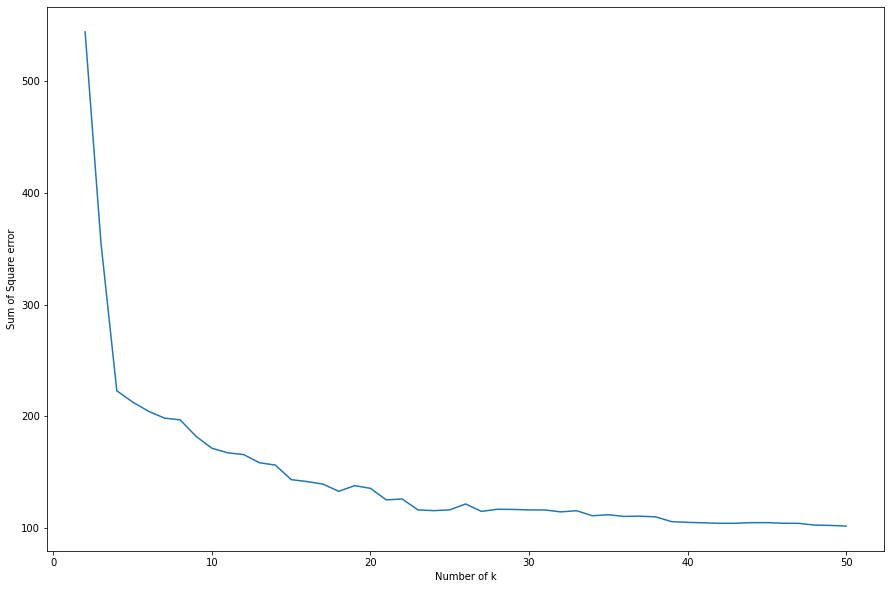

In [174]:
#可能要等幾分鐘QQ，因為我一開始的四個cluster是經過第一小題的優化方式優化過的，所以總體計算時間會變久
#我有印進度條%數
def kmeans(k):
    #df_csv=pd.read_csv('cdata.csv')
    #color=['r','y','g','b']
    to_other=[]
    for i in range(len(df_csv)):
        dis=0
        for j in range(len(df_csv)):
            dis+=np.sqrt((df_csv['x'][i]-df_csv['x'][j])**2+(df_csv['y'][i]-df_csv['y'][j])**2)
        to_other.append(dis)
    #print(to_other)
    a=[]
    for i in range(len(to_other)):
        a.append(to_other[i])
    a.sort(reverse=False)
    #print(a)
    #print(to_other)
    list_cluster=[]
    for i in range(k):
        list_cluster.append(a[i])
    #print(list_cluster)
    #print(list_cluster)
    #print(to_other)
    lst=[]
    for i in range(len(list_cluster)):
        for j in range(len(to_other)):
            if list_cluster[i]==to_other[j]:
                lst.append(df_csv['x'][j])
                lst.append(df_csv['y'][j])
    #print(lst)

    min_dist=[]
    cluster=[]
    for i in range(len(df_csv)):
        dist=[]
        for j in range(0,len(lst),2):
            a=np.sqrt((df_csv['x'][i]-lst[j])**2+(df_csv['y'][i]-lst[j+1])**2) 
            dist.append(a)
        min_dist.append(min(dist))
        cluster.append(dist.index(min(dist)))
    df_csv['cluster']=cluster
    df_csv

    
    #lst=[[]*2]*k
    while(True):
        
        lst=[]
        clst=df_csv['cluster'].tolist()
        for i in range(k):
            x=[]
            y=[]
            for j in range(len(df_csv)):
        
                #print(df_csv)
                #print()
              #  print(type(df_csv['cluster'][j]))
              #  print(type(i))
                if df_csv['cluster'][j]==i:
                    x.append(df_csv['x'][j])
                    y.append(df_csv['y'][j])
            #print(x)
            lst.append(np.mean(x))
            lst.append(np.mean(y))
        min_dist=[]
        cluster=[]
       # color_list=[]
        for i in range(len(df_csv)):
            dist=[]
            for j in range(0,len(lst),2):
                a=np.sqrt((df_csv['x'][i]-lst[j])**2+(df_csv['y'][i]-lst[j+1])**2) 
                dist.append(a)
            min_dist.append(min(dist))
            cluster.append(dist.index(min(dist)))
            #color_list.append(color[dist.index(min(dist))])
        #df_csv['color']=color_list
        if cluster==clst:
            break
        else:
            df_csv['cluster']=cluster
    total=0
    #print(len(lst))
    for i in range(0,len(lst),2):
        for j in range(len(df_csv)):
            if df_csv['cluster'][j]==(i/2):
                total+=np.sqrt((lst[i]-df_csv['x'][j])**2+(lst[i+1]-df_csv['y'][j])**2)
                
    return total
SSE=[]
for i in range(2,51):
        print(str(i*2),"%","...")
        SSE.append(kmeans(i))
        #clear_output()
print("finish!!")
mpl.figure(figsize=(15,10))
x=list(range(2,51))
y=SSE

mpl.plot(x,y)
mpl.xlabel("Number of k")
mpl.ylabel("Sum of Square error")



Text(0, 0.5, 'Sum of Square error')

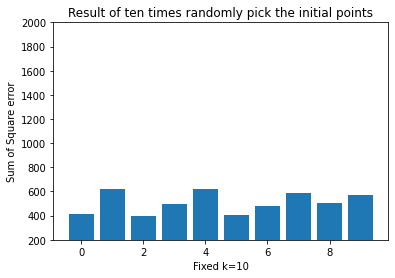

In [175]:
k=1
SSE=[]
while k<11:
    x=df_csv['x'].values
    y=df_csv['y'].values
    random=df_csv.sample(n=4)
    randx=random['x'].values
    randy=random['y'].values
    lst=[[],[],[],[]]
    for i in range(4):
        lst[i].append(randx[i])
        lst[i].append(randy[i])
    min_dist=[]
    cluster=[]
    for i in range(len(df_csv)):
        dist=[]
        for j in range(len(lst)):
            dist.append(np.sqrt((df_csv['x'][i]-lst[j][0])**2+(df_csv['y'][i]-lst[j][1])**2))
        min_dist.append(np.min(dist))
        cluster.append(dist.index(np.min(dist)))
    df_csv['cluster']=cluster
    total=0
    for i in range(len(lst)):
        for j in range(len(df_csv)):
            if df_csv['cluster'][j]==i:
                total+=np.sqrt((lst[i][0]-df_csv['x'][j])**2+(lst[i][1]-df_csv['y'][j])**2)
    SSE.append(total)
    k+=1
#print(SSE)
    #print(df_csv)
x=list(range(0,10))
y=SSE


mpl.bar(x,y)
mpl.ylim(200,2000)
mpl.title("Result of ten times randomly pick the initial points")
mpl.xlabel("Fixed k=10")
mpl.ylabel("Sum of Square error")    
    